Exploratory data analysis overview

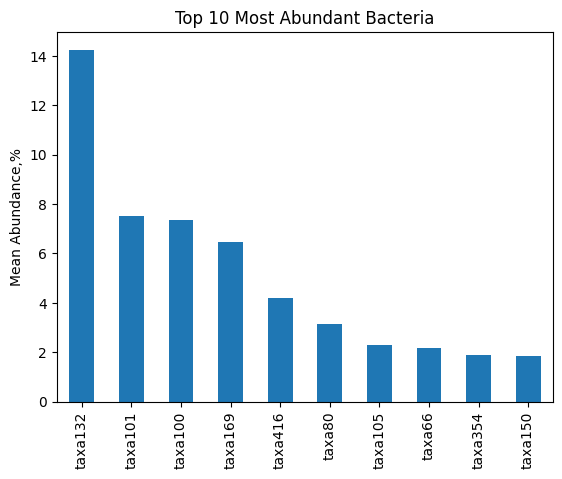

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# load abundance table
#df = pd.read_csv('/Users/ketpantuh/Documents/1MyDisk/Code/Code_R/Utrecht/input/Kateryna_abundanceData_MetaPhLan3.csv', index_col=0)

# calculate mean abundance across samples
mean_abundance = abud.mean(axis=1)

# sort mean abundance in descending order
sorted_abundance = mean_abundance.sort_values(ascending=False)

# plot top 10 most abundant bacteria
num_bacteria = 10
top_bacteria = sorted_abundance[:num_bacteria]
top_bacteria.plot(kind='bar')
plt.title('Top {} Most Abundant Bacteria'.format(num_bacteria))
plt.ylabel('Mean Abundance,%')
plt.show()

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [14]:
# Load the abundance table and health data into pandas dataframes
abundance_table = pd.read_csv('/Users/ketpantuh/Documents/1MyDisk/Code/Code_R/Utrecht/input/Kateryna_abundanceData_MetaPhLan3.csv')
health_data = pd.read_csv('/Users/ketpantuh/Documents/1MyDisk/Code/Code_R/Utrecht/input/Kateryna_phenotypeData.csv')

merged_data = pd.merge(abundance_table, health_data, on='subject_id')
merged_data.head(3)

#pmrg = merged_data.head(500)

,subject_id,taxa1,taxa2,taxa3,taxa4,taxa5,taxa6,taxa7,taxa8,taxa9,...,taxa652,taxa653,taxa654,taxa655,taxa656,BMI,age,gender,depression,diabetes
0,EGVD000009,0.0,0.08211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17.76,72.0,0,1,0
1,EGVD000026,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,25.79,37.0,0,0,0
2,EGVD000042,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,21.39,77.0,0,0,0


In [15]:
# input abundance table should be in the format where 
# rows represent different species and 
# columns represent different samples. 
 
abud = abundance_table.set_index('subject_id').T
abud.head(2)

subject_id,EGVD000009,EGVD000026,EGVD000042,EGVD000051,EGVD000065,EGVD000076,EGVD000082,EGVD000085,EGVD000095,EGVD000125,...,EGVD638246,EGVD706418,EGVD721524,EGVD828954,EGVD860586,EGVD879862,EGVD917093,EGVD932012,EGVD975563,EGVD995819
taxa1,0.00000,0.0,0.0,0.0,0.00000,0.0,0.00000,0.0,0.0,0.0,...,0.00000,0.0,0.0,0.00000,0.0000,0.000,0.00000,0.0,0.00000,0.0000
taxa2,0.08211,0.0,0.0,0.0,0.01282,0.0,0.03497,0.0,0.0,0.0,...,0.03268,0.0,0.0,0.07671,0.0711,0.035,0.00198,0.0,0.00757,0.0235


In [9]:
health_data.head(2)

,subject_id,BMI,age,gender,depression,diabetes
0,EGVD049674,20.24,35.0,1,0,0
1,EGVD046120,18.89,36.0,1,0,0


In [19]:
# calculate Bray-Curtis dissimilarity matrix
bray = pairwise_distances(abud, metric="euclidean")

# run MDS and plot
mds = MDS(n_components=2, dissimilarity="precomputed").fit_transform(bray)
mds_df = pd.DataFrame(mds, columns=["MDS1", "MDS2"])
mds_df["health"] = health_data["depression"]


Text(0.5, 1.0, 'MDS plot of beta-diversity')

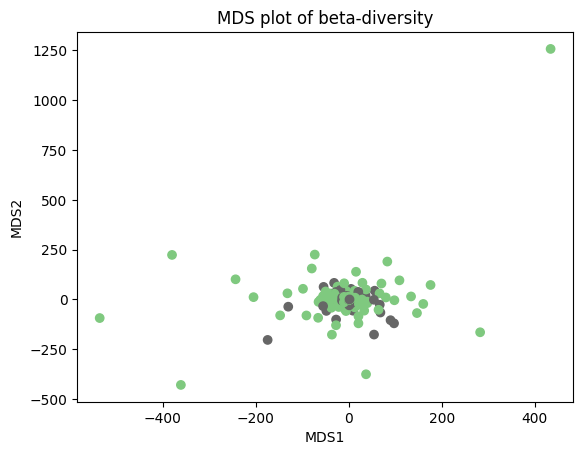

In [24]:
fig, ax = plt.subplots()
ax.scatter(x=mds_df["MDS1"], y=mds_df["MDS2"], c=mds_df["health"], cmap="Accent")
ax.set_xlabel("MDS1")
ax.set_ylabel("MDS2")
ax.set_title("MDS plot of beta-diversity")

Try with CLR transformation

In [7]:
#!pip install scikit-bio

In [10]:
from skbio.stats.composition import clr

clr_transformed_table = pd.DataFrame(clr(abud+1),
                                     index=abud.index,
                                     columns=abud.columns)

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 80 from PyObject